In [384]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as s
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib import pyplot

In [340]:
data=pd.read_excel("C:/Users/HP/Desktop/Data Science Projects-Anusha/Dummy Data HSS1.xlsx")
data.rename(columns={'Social Media':'Social_Media'},inplace=True)
data

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [341]:
#Create dummy values for column 'Influencer' since it has categorical data
infl_dummy=pd.get_dummies(data['Influencer'])
infl_dummy

,Macro,Mega,Micro,Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4567,0,0,1,0
4568,0,0,0,1
4569,0,0,1,0
4570,1,0,0,0


In [361]:
step_1=pd.concat([data,infl_dummy],axis=1)
step_1.drop(['Influencer'],inplace=True,axis=1)
step_1

,TV,Radio,Social_Media,Sales,Macro,Mega,Micro,Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


In [362]:
#Normalize the data
scaler= MinMaxScaler()

In [363]:
normdata= pd.DataFrame(scaler.fit_transform(step_1),columns=step_1.columns,index=step_1.index)
print(normdata)

            TV     Radio  Social_Media     Sales  Macro  Mega  Micro  Nano
0     0.066667  0.134346      0.207984  0.070696    0.0   1.0    0.0   0.0
1     0.033333  0.189011      0.172336  0.046499    0.0   1.0    0.0   0.0
2     0.344444  0.325058      0.208372  0.357421    0.0   1.0    0.0   0.0
3     0.811111  0.614263      0.495098  0.802231    0.0   1.0    0.0   0.0
4     0.055556  0.172634      0.100558  0.076288    0.0   0.0    1.0   0.0
...        ...       ...           ...       ...    ...   ...    ...   ...
4567  0.177778  0.091501      0.051286  0.190719    0.0   0.0    1.0   0.0
4568  0.677778  0.421727      0.468153  0.654597    0.0   0.0    0.0   1.0
4569  0.377778  0.405140      0.364490  0.397837    0.0   0.0    1.0   0.0
4570  0.677778  0.358784      0.138814  0.668141    1.0   0.0    0.0   0.0
4571  0.355556  0.326700      0.360939  0.351487    0.0   0.0    1.0   0.0

[4572 rows x 8 columns]


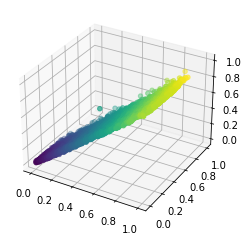

In [366]:
#Plot the normalized data
x=normdata['TV']
y=normdata['Social_Media']
z=normdata['Sales']
fig=plt.figure()
ax= fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c = np.linalg.norm([x,y,z],axis=0))

In [368]:
#Overall accuracy of the model=99.9%
model1= ols('Sales ~ TV+Radio+Social_Media+Macro+Mega+Micro+Nano',data=normdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.385e+05
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:06:30   Log-Likelihood:                 14667.
No. Observations:                4547   AIC:                        -2.932e+04
Df Residuals:                    4540   BIC:                        -2.928e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0103      0.000     41.540      0.000       0.010       0.011
TV               0.9629      0.001    967.669      0.000       0.961       0.965
Radio         3.059e-05      0.002      0.020      0.984      -0.003       0.003
Social_Media -4.671e-05      0.001     -0.041      0.967      -0.002       0.002
Macro            0.0026      0.000     10.164      0.000       0.002       0.003
Mega             0.0029      0.000     11.338      0.000       0.002       0.003
Micro            0.0024      0.000      9.640      0.000       0.002       0.003
Nano             0.0024      0.000      9.421      0.000       0.002       0.003
==============================================================================
Omnibus:                     4448.908   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2018806.345
Skew:                           3.944   Prob(JB):                         0.00
Kurtosis:                     105.925   Cond. No.                     9.32e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [370]:
#Test the model accuracy this time by splitting the data into training and testing set
#Assigning y label=Sales to the last column/interchanging the columns Macro and Sales
colsint=['TV','Radio','Social_Media','Macro','Mega','Micro','Nano','Sales']
normdata1=normdata.reindex(columns=colsint)
normdata1

,TV,Radio,Social_Media,Macro,Mega,Micro,Nano,Sales
0,0.066667,0.134346,0.207984,0.0,1.0,0.0,0.0,0.070696
1,0.033333,0.189011,0.172336,0.0,1.0,0.0,0.0,0.046499
2,0.344444,0.325058,0.208372,0.0,1.0,0.0,0.0,0.357421
3,0.811111,0.614263,0.495098,0.0,1.0,0.0,0.0,0.802231
4,0.055556,0.172634,0.100558,0.0,0.0,1.0,0.0,0.076288
...,...,...,...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.0,0.0,1.0,0.0,0.190719
4568,0.677778,0.421727,0.468153,0.0,0.0,0.0,1.0,0.654597
4569,0.377778,0.405140,0.364490,0.0,0.0,1.0,0.0,0.397837
4570,0.677778,0.358784,0.138814,1.0,0.0,0.0,0.0,0.668141


In [374]:
#Handling missing values
normdata1['TV'].fillna(value=normdata1['TV'].mean(),inplace=True)
normdata1['Radio'].fillna(value=normdata1['Radio'].mean(),inplace=True)
normdata1['Social_Media'].fillna(value=normdata1['Social_Media'].mean(),inplace=True)
normdata1['Macro'].fillna(value=normdata1['Macro'].mean(),inplace=True)
normdata1['Sales'].fillna(value=normdata1['Sales'].mean(),inplace=True)
normdata1

,TV,Radio,Social_Media,Macro,Mega,Micro,Nano,Sales
0,0.067,0.134,0.208,0.0,1.0,0.0,0.0,0.071
1,0.033,0.189,0.172,0.0,1.0,0.0,0.0,0.046
2,0.344,0.325,0.208,0.0,1.0,0.0,0.0,0.357
3,0.811,0.614,0.495,0.0,1.0,0.0,0.0,0.802
4,0.056,0.173,0.101,0.0,0.0,1.0,0.0,0.076
...,...,...,...,...,...,...,...,...
4567,0.178,0.092,0.051,0.0,0.0,1.0,0.0,0.191
4568,0.678,0.422,0.468,0.0,0.0,0.0,1.0,0.655
4569,0.378,0.405,0.364,0.0,0.0,1.0,0.0,0.398
4570,0.678,0.359,0.139,1.0,0.0,0.0,0.0,0.668


In [375]:
#Rounding off all the values upto 3 places in decimal
normdata1['TV']= round(normdata1['TV'],3)
normdata1['Radio']= round(normdata1['Radio'],3)
normdata1['Social_Media']= round(normdata1['Social_Media'],3)
normdata1['Sales']= round(normdata1['Sales'],3)
normdata1

,TV,Radio,Social_Media,Macro,Mega,Micro,Nano,Sales
0,0.067,0.134,0.208,0.0,1.0,0.0,0.0,0.071
1,0.033,0.189,0.172,0.0,1.0,0.0,0.0,0.046
2,0.344,0.325,0.208,0.0,1.0,0.0,0.0,0.357
3,0.811,0.614,0.495,0.0,1.0,0.0,0.0,0.802
4,0.056,0.173,0.101,0.0,0.0,1.0,0.0,0.076
...,...,...,...,...,...,...,...,...
4567,0.178,0.092,0.051,0.0,0.0,1.0,0.0,0.191
4568,0.678,0.422,0.468,0.0,0.0,0.0,1.0,0.655
4569,0.378,0.405,0.364,0.0,0.0,1.0,0.0,0.398
4570,0.678,0.359,0.139,1.0,0.0,0.0,0.0,0.668


In [376]:
X=normdata1.drop(['Sales'],axis=1).values
y=normdata1['Sales'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=53)
X_train, X_test, y_train, y_test

(array([[0.733, 0.536, 0.295, ..., 0.   , 0.   , 0.   ],
        [0.644, 0.524, 0.462, ..., 0.   , 0.   , 1.   ],
        [0.078, 0.145, 0.019, ..., 0.   , 1.   , 0.   ],
        ...,
        [0.5  , 0.548, 0.493, ..., 1.   , 0.   , 0.   ],
        [0.1  , 0.049, 0.036, ..., 1.   , 0.   , 0.   ],
        [0.856, 0.586, 0.309, ..., 1.   , 0.   , 0.   ]]),
 array([[0.867, 0.518, 0.367, ..., 0.   , 0.   , 0.   ],
        [0.267, 0.282, 0.14 , ..., 0.   , 1.   , 0.   ],
        [0.289, 0.282, 0.124, ..., 0.   , 0.   , 1.   ],
        ...,
        [0.722, 0.415, 0.618, ..., 0.   , 0.   , 1.   ],
        [0.49 , 0.713, 0.557, ..., 1.   , 0.   , 0.   ],
        [0.311, 0.172, 0.135, ..., 0.   , 1.   , 0.   ]]),
 array([0.716, 0.63 , 0.077, ..., 0.502, 0.119, 0.828]),
 array([0.843, 0.267, 0.295, 0.054, 0.711, 0.47 , 0.26 , 0.612, 0.779,
        0.734, 0.539, 0.664, 0.264, 0.328, 0.363, 0.323, 0.008, 0.82 ,
        0.131, 0.729, 0.761, 0.284, 0.831, 0.125, 0.277, 0.546, 0.674,
        0.279, 0

In [377]:
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [378]:
y_pred= reg.predict(X_test)
y_pred

array([0.84525921, 0.27119774, 0.29210658, 0.05621928, 0.69528062,
       0.46151116, 0.25911815, 0.60917063, 0.77306476, 0.74139942,
       0.54833199, 0.65470398, 0.29279517, 0.31390882, 0.37051461,
       0.32043664, 0.01436624, 0.81599629, 0.12238147, 0.71899249,
       0.77140361, 0.26923286, 0.84789233, 0.11976389, 0.2942814 ,
       0.54680556, 0.67993911, 0.28162152, 0.37689672, 0.29972137,
       0.3421394 , 0.73890964, 0.24637093, 0.1206661 , 0.3901515 ,
       0.03382389, 0.100028  , 0.31369518, 0.4636504 , 0.46756301,
       0.1292728 , 0.53484585, 0.85827841, 0.19445618, 0.76039458,
       0.3975868 , 0.37726769, 0.36699869, 0.67418069, 0.33697029,
       0.75110639, 0.10018568, 0.69586042, 0.18235411, 0.81526525,
       0.8649906 , 0.53565605, 0.42829657, 0.05652585, 0.14242051,
       0.15159755, 0.3991651 , 0.02637519, 0.46508588, 0.63134485,
       0.10101168, 0.70731978, 0.42726802, 0.90914607, 0.52904468,
       0.24032574, 0.24784957, 0.77176905, 0.47200943, 0.25852

In [379]:
accuracyscore= r2_score(y_test,y_pred)
accscore

0.9913523385051571

In [382]:
#Testing individual features
feat_imp= reg.coef_
for i,v in enumerate(feat_imp):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.95149
Feature: 1, Score: 0.01420
Feature: 2, Score: 0.00164
Feature: 3, Score: -0.00047
Feature: 4, Score: 0.00028
Feature: 5, Score: 0.00009
Feature: 6, Score: 0.00009
